In [1]:
import numpy as np, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle
from matplotlib.pyplot import *

In [2]:
def plots(mb,i,fltr='cinv',ytype='nilc',mtype=0,dtype='dr2_smica',cmask='Lmask',form='{:.2f}',co='r',Lab='Baseline'):
    #s = mb.bc*(mb.bc+1)/2/np.pi*1e8
    s = mb.bc*1e10
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    __, __, __, __, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.)
    fxtBH = tools_y.init_cross(qtBH,cy,p.ids,p.stag,est='bh-lens')
    #pl.plot_1dstyle(ymin=-1.,ymax=1.,ylab=r'$10^8\times L(L+1)C_L^{\tau y}/2\pi$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
    pl.plot_1dstyle(ymin=-1.,ymax=1.,ylab=r'$10^{10}\times LC_L^{\tau y}$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
    mcb, vcb, scb, ocb = bn.binned_spec(mb,fxtBH.xl,cn=1)
    errorbar(mb.bc+i*21-50,s*ocb,yerr=s*vcb,fmt='o',color=co,label=Lab)

In [3]:
def plots_tt(mb,dtype='dr2_smica',cmask='Lmask',form='{:.2f}'):
    p = prjlib.init_analysis(dtype=dtype,fltr='cinv',wtype=cmask)
    qobj = {}
    __, __, __, qobj['lens'], qobj['lens-src'] = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    for bh in ['lens','lens-src']:
        ott, mtt, stt, __ = prjlib.load_binned_tt(mb,qobj[bh],p.rlz)

In [4]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

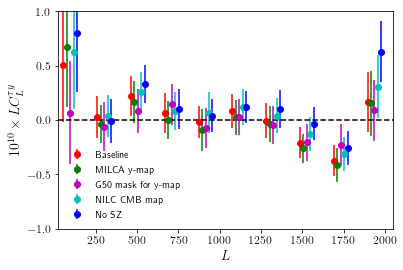

In [5]:
plots(mb,0)
plots(mb,1,co='g',ytype='milca',Lab='MILCA y-map')
plots(mb,2,co='m',mtype=1,Lab='G50 mask for y-map')
plots(mb,3,co='c',dtype='dr2_nilc',Lab='NILC CMB map')
##plots(mb,4,co='b',cmask='G60Lmask',Lab='G60 lensing mask for CMB map')
plots(mb,4,co='b',dtype='dr3_nosz',cmask='LmaskDR3',Lab='No SZ')
##plots(mb,5,co='b',fltr='none',Lab='diag')
axhline(0.,color='k',ls='--')
legend()
savefig('fig_tauxy_comparison.pdf')
#savefig('fig_tauxy_comparison.png',dpi=600)
show()